In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox

In [4]:
graph = ox.graph.graph_from_xml("./osmprueba/mapa1.osm",bidirectional=True,simplify=True,retain_all=True)
gdf_nodos, gdfedges= ox.graph_to_gdfs(graph)

In [6]:
gdf_nodos.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
graphProyectado=ox.project_graph(graph)
gdf_nodosP, gdfedgesP= ox.graph_to_gdfs(graphProyectado)

In [9]:
gdfedgesP.crs

<Projected CRS: +proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

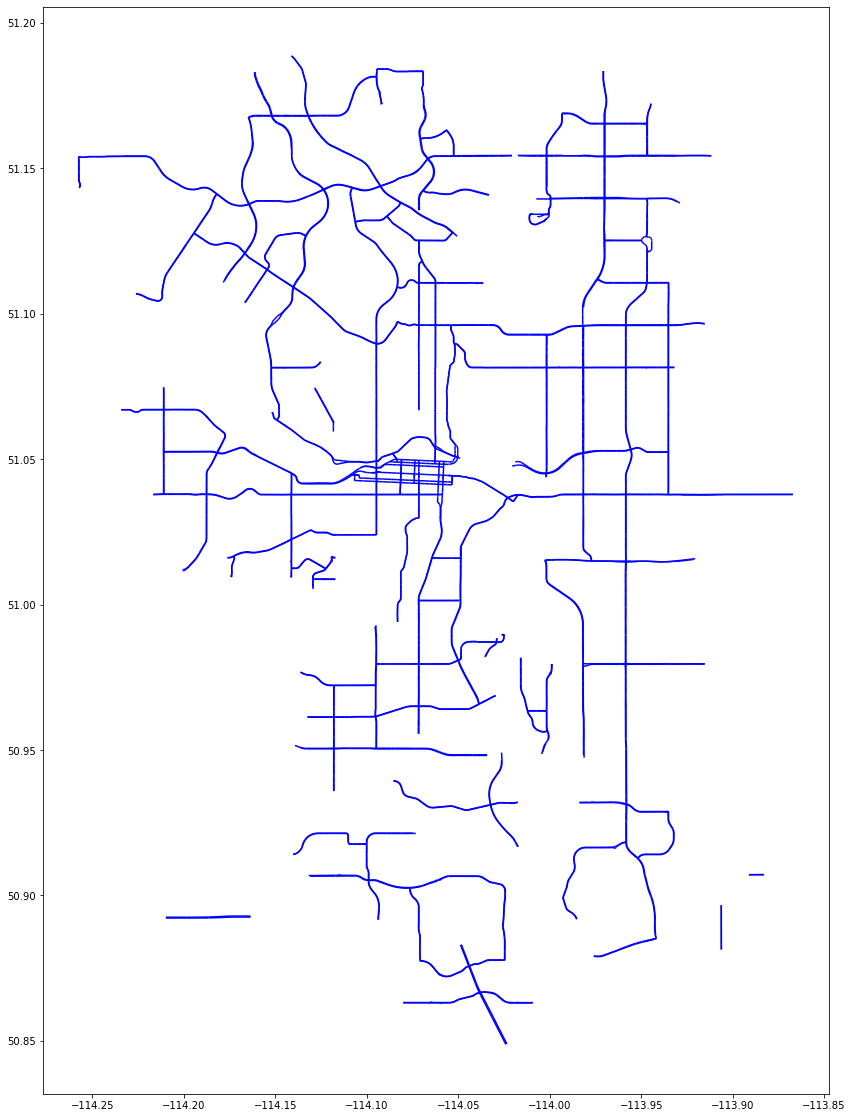

In [13]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)
gdfedgesFiltrado.plot(ax=ax1,color="blue")

In [11]:
place = "Calgary, Canada"
graph2 = ox.graph_from_place(place,network_type="drive")
gdf_nodos2, gdfedges2= ox.graph_to_gdfs(graph2)

In [12]:
gdfedgesFiltrado = gdfedges2[gdfedges2["highway"].isin(["primary","secondary"])]

In [14]:
ox.io.save_graph_shapefile(graph2,filepath="./osmprueba",encoding="utf-8",directed=False)

/home/rene/anaconda3/lib/python3.7/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [15]:
inicio = 3350867314
final = 302115233
resultado = ox.distance.shortest_path(graph2,inicio,final,weight="length",cpus=1)


In [17]:
gdfCamino = gdfedges2.loc[resultado]

In [18]:
def get_unique(numbers):
    list_of_unique_numbers = []
    unique_numbers = set(numbers)
    for number in unique_numbers:
        list_of_unique_numbers.append(number)
    return list_of_unique_numbers
indicesLista = gdfCamino.index
lista = []
for i in range(len(indicesLista)):
    a = indicesLista[i][0]
    b = indicesLista[i][1]
    lista.append(a)
    lista.append(b)
indicesEdges= get_unique(lista)
gdfnodos2f = gdf_nodos2.loc[indicesEdges]

In [19]:
Gvuelta = ox.graph_from_gdfs(gdfnodos2f,gdfCamino)
ox.io.save_graph_shapefile(Gvuelta,filepath="./camino",encoding="utf-8",directed=False)

/home/rene/anaconda3/lib/python3.7/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
